In [ ]:
!pip install preliz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


# Context

Sharks are a common fear across people around the world, and many of those people fear of being attacked by one. It is no secret that this can happen, but how many of reported shark attacks happen every year on average from 2000 to 2023?

I got my data from the Global Shark Attack File [incident log.](https://www.sharkattackfile.net/incidentlog.htm)

# Data

In [ ]:
data = {'Year': [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],'Attacks': [109, 98, 110, 101, 115, 123, 140, 134, 143, 126, 122, 117, 128, 101, 120, 122, 113, 103, 103, 93, 92, 88, 92, 97]}
data_sharkattacks = pd.DataFrame(data)
display(data_sharkattacks)

,Year,Attacks
0,2023,109
1,2022,98
2,2021,110
3,2020,101
4,2019,115
5,2018,123
6,2017,140
7,2016,134
8,2015,143
9,2014,126


(array([4., 2., 4., 1., 3., 2., 4., 1., 1., 2.]),
 array([ 88. ,  93.5,  99. , 104.5, 110. , 115.5, 121. , 126.5, 132. ,
        137.5, 143. ]),
 <BarContainer object of 10 artists>)

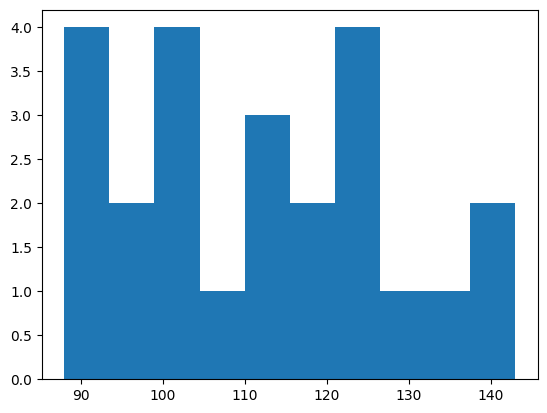

In [ ]:
plt.hist(data_sharkattacks.Attacks)

#Prior

My prior for the two following likelihood distributions is based upon $\mu$. I have chosen my $\mu$ to be 100, as it seems feasible for an average of 100 reported shark attacks to happen per year, and that is what I believe deep down in my heart. However, I think that the data may be skewed right due to lack of ability to report such attacks in the late 1900s, and I am not too sure of the true mean.

<Axes: >

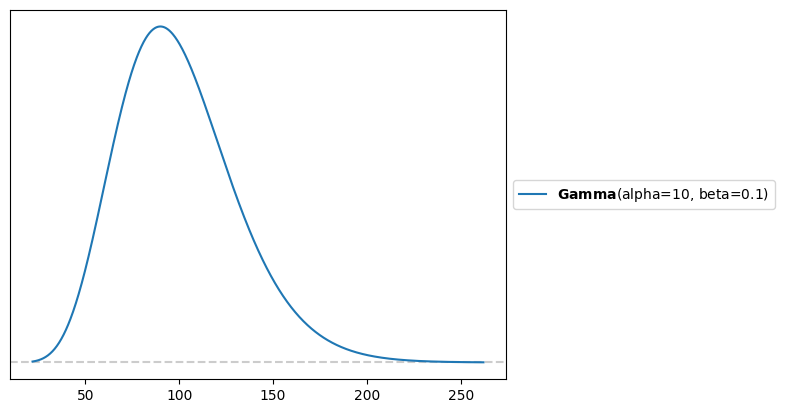

In [ ]:
gamma_dist=pz.Gamma(alpha=10, beta=0.1)
gamma_dist.plot_pdf()

<Axes: >

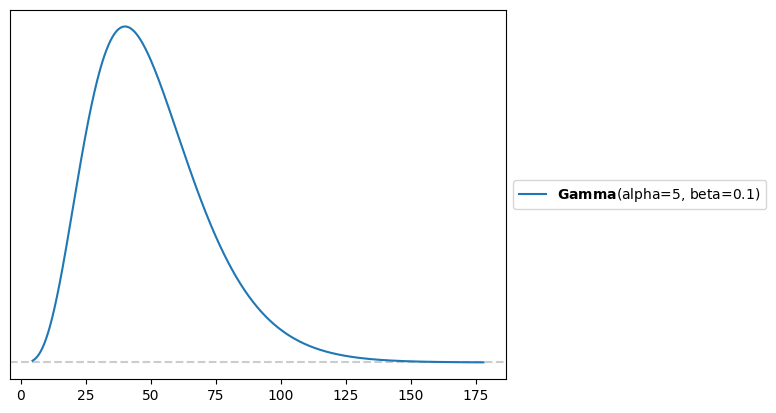

In [ ]:
gamma_dist=pz.Gamma(alpha=5, beta =0.1)
gamma_dist.plot_pdf()


#Poisson Distribution

I chose this distribution as it is discrete and counts data over a fixed amount of time.

In [ ]:

with pm.Model() as model_1sharkattacksS:

    μ = pm.Gamma('μ', alpha = 10, beta = 0.1)


    Y = pm.Poisson('Y', mu = μ, observed=data_sharkattacks.Attacks)
    idata_1sharkattacksS = pm.sample()


Output()

<Axes: title={'center': 'μ'}>

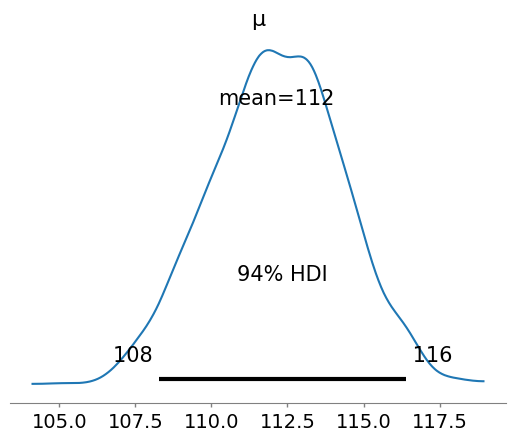

In [ ]:
az.plot_posterior(idata_1sharkattacksS)


In [ ]:
pm.sample_posterior_predictive(idata_1sharkattacksS, model=model_1sharkattacksS, extend_inferencedata=True)


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

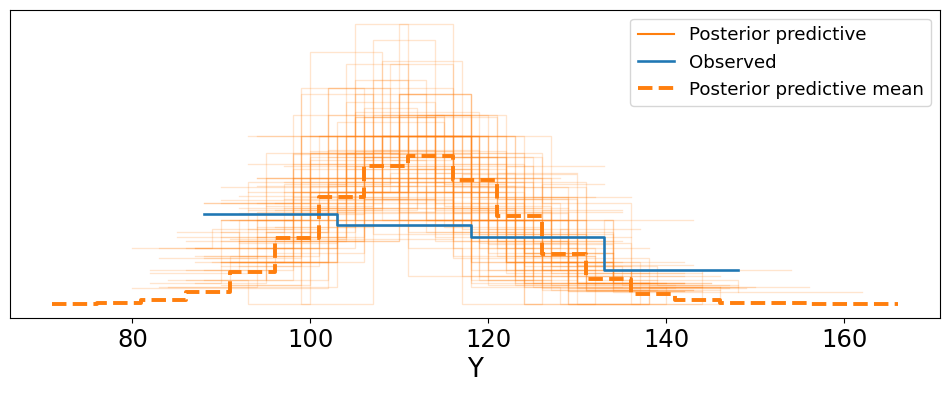

In [ ]:
az.plot_ppc(idata_1sharkattacksS, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


I do not have a lot of data points (as I eliminated earlier years due to it causing bimodal data), so I cannot say with much certainty that the model matches the data. I can say with very little certainty that the true mean is between 90 and 130, but that is about it.

#Negative Binomial Distribution

I chose this distribution as it uses a Poisson process, but the rate parameter is gamma distributed, accounting for additional variance. (Also Mr. Arredondo suggested it!)

For alpha, I chose 50 because the larger the alpha the greater the variance of the distribution.

In [ ]:

with pm.Model() as model_2sharkattacksS:

    μ = pm.Gamma('μ', alpha = 10, beta = 0.1)

    α = pm.Gamma('α', alpha = 50, beta =1)

    Y = pm.NegativeBinomial('Y', mu = μ, alpha = α, observed=data_sharkattacks.Attacks)
    idata_2sharkattacksS = pm.sample()

Output()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'μ'}>],
      dtype=object)

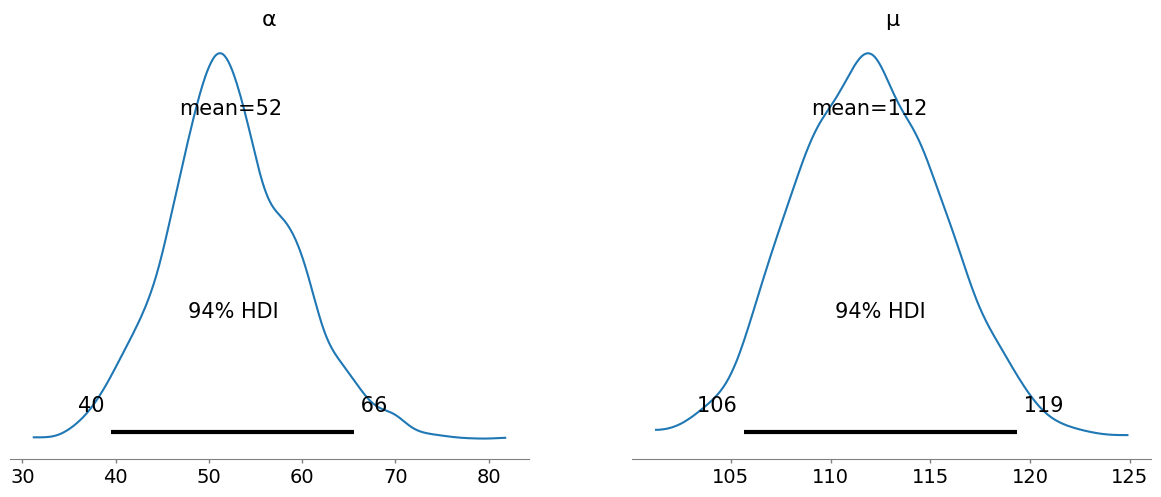

In [ ]:
az.plot_posterior(idata_2sharkattacksS)

In [ ]:
pm.sample_posterior_predictive(idata_2sharkattacksS, model=model_2sharkattacksS, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

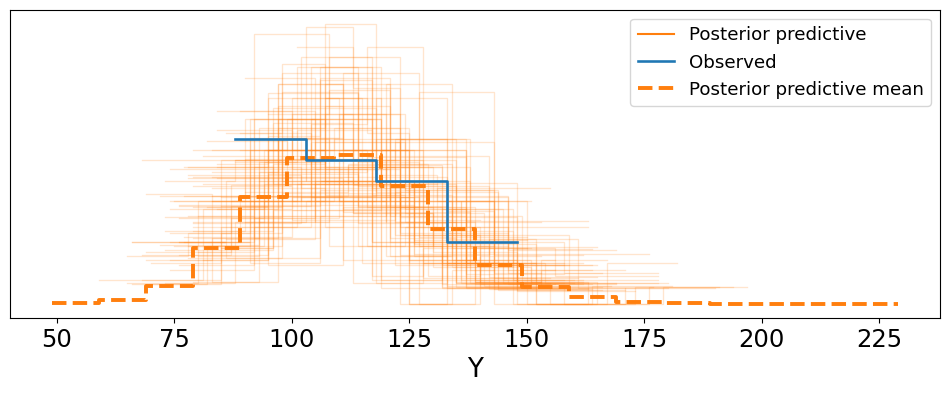

In [ ]:
az.plot_ppc(idata_2sharkattacksS, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The negative binomial distribution does model my data much better. It shows me that the true mean of shark attacks from the year 2000-2023 is most likely between 106-119.